# Conexiones a Fuentes de Datos de Meli

<div class="alert alert-block alert-info" >
<li><a href="#cred">Credenciales</a></li>
<li><a href="#presto">Conexión a Presto</a></li>
<li><a href="#hive">Conexión a Hive</a></li>
<li><a href="#ga">Conexión a Google Analytcis</a></li>
<li><a href="#hotjar">Conexión a Hotjar</a></li>
<li><a href="#teradata">Conexión a Teradata</a></li>
<li><a href="#mysql">Conexión a Mysql</a></li>
<li><a href="#jira">Conexión a Jira</a></li>
<li><a href="#items">Conexión a Api Items MELI</a></li>
<br>
</div>

<a id="cred"></a>
<img src="https://academiasilabas.com/wp-content/uploads/2018/01/Llaves.png" width=90/>
<hr>

Se definen los usuarios, passwords y hosts en el archivo pass.json

In [2]:
import json
cred = json.loads(open('pass.json').read())

In [3]:
import pandas as pd

<a id="presto"></a>
<img src="https://d2uars7xkdmztq.cloudfront.net/app_resources/9403/overview/img5085526394023443369.png" width=200/>
<hr>

In [7]:
from pyhive import presto

In [9]:
con = presto.Connection(host=cred['host_presto'], port=80)

In [10]:
df = pd.read_sql_query("select count(*) as cantidad, application.site_id from tracks where ds >= '2018-05-13' and ds < '2018-05-14' and path='/checkout/congrats' and application.site_id in ('MLA', 'MLC', 'MLU', 'MCO', 'MLM') group by application.site_id", con)

In [11]:
df.head()

,cantidad,site_id
0,12557,MCO
1,115001,MLA
2,72403,MLM
3,8914,MLU
4,13981,MLC


<a id="hive"></a>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/bb/Apache_Hive_logo.svg/1200px-Apache_Hive_logo.svg.png" width=100/>
<hr>

In [12]:
from pyhive import hive

In [14]:
conn = hive.Connection(host=cred['host_hive'], database="default", port=10000, auth="LDAP", username=cred['username'], password=cred['password_hive'])

In [15]:
df = pd.read_sql_query("select path, type, ds from tracks where ds>='2018-01-01' and ds<'2018-01-02' limit 10", conn)

In [16]:
df.head()

,path,type,ds
0,/vip,view,2018-01-01 00
1,/vip,view,2018-01-01 00
2,/search,view,2018-01-01 00
3,/vip,view,2018-01-01 00
4,/search,view,2018-01-01 00


<a id="ga"></a>
<img src="http://www.bigpubli.com/wp-content/uploads/2017/11/google-analytics-logo.png" width=200/>
<hr>

In [17]:
from google2pandas import GoogleAnalyticsQueryV4 #última versión de la API

In [20]:
conn = GoogleAnalyticsQueryV4(secrets='meli_ga.json')
import logging
logging.getLogger('googleapiclient.discovery_cache').setLevel(logging.ERROR)

In [21]:
query_wd = {
    'reportRequests': [{
        'viewId' : 'ga:80828321',
        'dateRanges': [{
            'startDate' : '2018-05-01',
            'endDate'   : '2018-05-10'}],
        'dimensions' : [
            {'name' : 'ga:date'}],
        'metrics'   : [
            {'expression' : 'ga:pageviews'}],
        "dimensionFilterClauses": [
        {
          "filters": [
            {
              "dimensionName": "ga:pagePath",
              "operator": "EXACT",
              "expressions": ["/HOME/MAIN/"]
            }
          ]
        }]                            
}]}

wd = conn.execute_query(query_wd)

In [22]:
wd.head()

,date,pageviews
0,20180501,963923
1,20180502,1616203
2,20180503,1610146
3,20180504,1452013
4,20180505,987695


<a id="hotjar"></a>
<img src="https://i1.wp.com/www.creativevisualart.com/wp-content/uploads/2014/10/hotjar-logo.png?fit=835%2C401" width=100/>
<hr>

Cri cri... Próximamente...

<a id="teradata"></a>
<img src="https://www.protegrity.com/wp-content/uploads/2017/02/Teradata-Logo.png" width=200/>
<hr>

In [4]:
import teradata
udaExec = teradata.UdaExec (appName="test2", version="1.0", logConsole=False)
with udaExec.connect(method="odbc",system=cred['host_teradata'], username=cred['username'],
                            password=cred['password_teradata'], driver="Teradata") as connect:
    query = "SELECT shp_shipment_id, CAST(shp_rule_cost as DECIMAL(6,2) format 'ZZZZ,ZZ'), CAST(shp_free_shipping_amount as DECIMAL(6,2) format 'ZZZZ,ZZ'), CAST(shp_mandatory_fs_discount as DECIMAL(6,2) format 'ZZZZ,ZZ') FROM WHOWNER.BT_SHP_USER_COST_COMPONENTS WHERE shp_user_type = 'sender' AND SHP_shipment_ID IN ('27647849680','27647786134','27647926660')"
    df = pd.read_sql(query,connect)
df.head()

,SHP_SHIPMENT_ID,SHP_RULE_COST,SHP_FREE_SHIPPING_AMOUNT,SHP_MANDATORY_FS_DISCOUNT
0,2.764785e+10,34.9,17.45,17.45
1,2.764779e+10,33.9,33.90,0.00
2,2.764793e+10,33.9,25.43,8.47


<a id="mysql"></a>
<img src="https://webprogramacion.com/imgs3/405.jpg" width=150/>
<hr>

In [88]:
import pymysql
import pymysql.cursors
import mysql.connector

In [90]:
cnx = mysql.connector.connect(user=cred['username'], password=cred['password_indiana'],
                              host=cred['host_indiana'],port='6612',
                              database='')

In [91]:
df = pd.read_sql_query("SELECT * FROM Indiana.sesiones_page_screen_w_categL1 where platform = 'iOS' and date >='20170701' and date <= '20170712' and page = '/VIP/ITEM/MAIN/' and site = 'MLA' and site = 'MLA'limit 100", cnx)
df.tail(10)

,site,platform,date,L1,page,sessions
90,MLA,iOS,20170701,{'MLM1182':'Instrumentos Musicales'},/VIP/ITEM/MAIN/,2
91,MLA,iOS,20170701,{'MLM1246':'Belleza y Cuidado Personal'},/VIP/ITEM/MAIN/,1
92,MLA,iOS,20170701,{'MLM1276':'Deportes y Fitness '},/VIP/ITEM/MAIN/,3
93,MLA,iOS,20170701,"{'MLM1430':'Ropa, Bolsas y Calzado'}",/VIP/ITEM/MAIN/,4
94,MLA,iOS,20170701,{'MLM1499':'Industrias y Oficinas'},/VIP/ITEM/MAIN/,1
95,MLA,iOS,20170701,"{'MLM1574':'Hogar, Muebles y Jardín'}",/VIP/ITEM/MAIN/,4
96,MLA,iOS,20170701,{'MLM1575':'Electrodomésticos'},/VIP/ITEM/MAIN/,1
97,MLA,iOS,20170701,{'MLM1648':'Computación'},/VIP/ITEM/MAIN/,2
98,MLA,iOS,20170701,"{'MLM1743':'Autos, Motos y Otros'}",/VIP/ITEM/MAIN/,5
99,MLA,iOS,20170701,{'MLM1747':'Accesorios para Vehículos'},/VIP/ITEM/MAIN/,4


<a id="jira"></a>
<img src="https://botw-pd.s3.amazonaws.com/styles/logo-thumbnail/s3/042012/jira.png?itok=QlHKhtKQ" width=100/>
<hr>

In [4]:
#from collections import Counter
from jira import JIRA
jira = JIRA(cred['host_jira'], basic_auth=(cred['email'], cred['password_jira']))

issues = jira.search_issues('issuetype = "Bug de Tracking"')

In [5]:
df = pd.DataFrame(columns=['Projecto', 'Incidencia', 'Reportó', 'Estado'])
for i in issues:
    df = df.append({'Projecto': i.fields.project.key, 
                    'Incidencia': i,
                    'Reportó': i.fields.reporter.displayName,
                    'Estado': i.fields.status,
                   }, ignore_index=True)
df.head()

,Projecto,Incidencia,Reportó,Estado
0,VIP,VIP-57,Lucia Blanc,Resuelto Desa
1,VIP,VIP-56,Lucia Blanc,Resuelto Desa
2,VIP,VIP-55,Lucia Blanc,Resuelto Desa
3,VIP,VIP-54,Lucia Blanc,Resuelto Desa
4,VIP,VIP-53,Lucia Blanc,Resuelto Desa


<a id="items"></a>
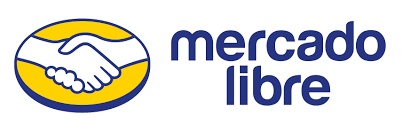
<hr>

In [4]:
import requests
r = requests.get("https://api.mercadolibre.com/items/", params = {"id":"MLB1022471805"})
if r.status_code == 200:
    print(r.text)

{"id":"MLB1022471805","site_id":"MLB","title":"Controle Remoto Samsung Smart Tv Led 4k Bn98-06901d Original","subtitle":null,"seller_id":60706949,"category_id":"MLB59785","official_store_id":null,"price":79.9,"base_price":79.9,"original_price":null,"currency_id":"BRL","initial_quantity":142,"available_quantity":50,"sold_quantity":50,"sale_terms":[],"buying_mode":"buy_it_now","listing_type_id":"gold_special","start_time":"2018-05-02T18:59:48.000Z","stop_time":"2038-04-27T04:00:00.000Z","condition":"new","permalink":"http://produto.mercadolivre.com.br/MLB-1022471805-controle-remoto-samsung-smart-tv-led-4k-bn98-06901d-original-_JM","pictures":[{"id":"714215-MLB25143593274_112016","url":"http://mlb-s2-p.mlstatic.com/714215-MLB25143593274_112016-O.jpg","secure_url":"https://mlb-s2-p.mlstatic.com/714215-MLB25143593274_112016-O.jpg","size":"127x499","max_size":"270x1062","quality":""},{"id":"840215-MLB25143593286_112016","url":"http://mlb-s1-p.mlstatic.com/840215-MLB25143593286_112016-O.jpg",

<div class="alert alert-block alert-info" style="margin-top: 20px" align="right">
ba-analytics@mercadolibre.com
</div>